In [37]:
# Import of required libraries and packages
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

print(ig.__version__)

0.8.0


## Task 1: Reading Data Files

In [4]:
# Open network file
# from http://vlado.fmf.uni-lj.si/pub/networks/data/mix/USAir97.net
# also available on Toledo
# download to your local drive 

#filename = easygui.fileopenbox()

filename = "./football/football.gml"
print(filename)

g = ig.Graph.Read_GML(filename)

ig.summary(g)
print('Is the network weighted:', g.is_weighted())


./football/football.gml
IGRAPH U--- 115 613 -- 
+ attr: id (v), label (v), value (v)
Is the network weighted: False


In [7]:
# Get the attributes and the number of nodes
print(g.vs.attribute_names())
print('Number of nodes: ', g.vcount())



['id', 'label', 'value']
Number of nodes:  115


In [8]:
# Get the attributes and the number of edges
print(g.es.attribute_names())
print('Number of Edges: ', g.ecount())


[]
Number of Edges:  613


The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  
  1 = Big East
  
  2 = Big Ten
  
  3 = Big Twelve
  
  4 = Conference USA
  
  5 = Independents
  
  6 = Mid-American
  
  7 = Mountain West
  
  8 = Pacific Ten
  
  9 = Southeastern
  
 10 = Sun Belt
 
 11 = Western Athletic

## Task 2: Calculating Centrality Measures

In [46]:
# Calculate centrality measures
degree = g.degree()
betweenness = g.betweenness(weights=None)
print("Number of degrees calculated : % 2d, minimum : % 2d, maximim : % 2d" %(len(degree), min(degree), max(degree)))
print("Betweeness: minimum: % 5.2f, maximum: % 5.4f" %(min(betweenness),max(betweenness)))
print()
print("Number of nodes: %s. Number of edges: %s" % (g.vcount(),g.ecount()))
print("Desity: %.4f" % (g.ecount()/(g.vcount()*(g.vcount()-1)/2)))

apl = g.average_path_length()

cls = g.closeness()
trans = g. transitivity_local_undirected() # Local clustering coefficient

plt.scatter(degree, betweenness, marker='x')
plt.title('Degree vs. betweenness')
plt.xlabel('Degree')
plt.ylabel('Betweenness')
print('Correlation between Degree and Betweenness',np.corrcoef(degree, betweenness)[0][1])




Number of degrees calculated :  115, minimum :  7, maximim :  12
Betweeness: minimum:  19.34, maximum:  215.9858

Number of nodes: 115. Number of edges: 613
Desity: 0.0935
Correlation between Degree and Betweenness 0.2812907817456892


In [24]:
# Using the default igraph function for the calculation and plotting of the degree distribution
deg_dist = g.degree_distribution()
ig.plot(deg_dist)

12


Text(0.5, 1.0, 'Distribution of Degrees')

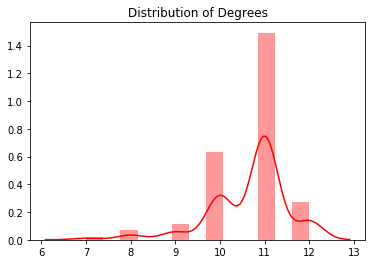

In [42]:
# Improved calculation of degree distribution and plotting using numpy and matplotlib
print(max(degree))
sns.distplot(degree,color='r')
plt.title('Distribution of Degrees')

### Describe the distribution
The distrubition is centered a around 11 and we have quite a skewed distribution with long tails towards small values, in this cas the minimum is 6

215.9857742762204


Text(0.5, 1.0, 'Distribution of Betweenness')

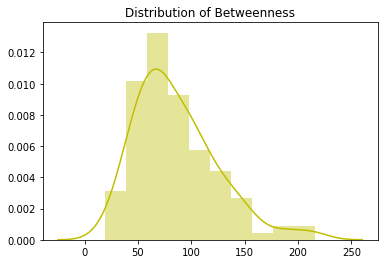

In [43]:
# Improved calculation of degree distribution and plotting using numpy and matplotlib
print(max(betweenness))
sns.distplot(betweenness,color='y')
plt.title('Distribution of Betweenness')

## Task 3: Graph Processing

In [47]:
# Average degree
avg_deg = np.average(degree)
print("Average degree: % 2d" %(avg_deg))

# Convert list of node degree to an np.array 
# This allows the use of functions from numpy
np_deg = np.array(degree)

np_deg = np.where(np_deg>=avg_deg)
print("Number of nodes with degree equal to or greater than the average degree: % 2d" %(len(np_deg[0])))

#Create subgraph using IDs of nodes to be retained
red_g = g.subgraph(np_deg[0])
print("Number of nodes in subgraph: % 2d" %(len(red_g.vs())))

Average degree:  10
Number of nodes with degree equal to or greater than the average degree:  78
Number of nodes in subgraph:  78


### Identifying the nodes with max Betweeness and degree

In [102]:
max_degree = max(degree)
np_degs = np.array(degree)
id_max_deg = np.where(np_degs == max_degree)
print('Nodes with maximun value for degree (%s): \n' % max_degree)
for x in id_max_deg[0]:
    print('label: ',str(g.vs[x]['label']).ljust(20), 'value: ',g.vs[x]['value'])
    
max_betweenness = max(betweenness)
np_bets = np.array(betweenness)
id_max_bet = np.where(np_bets == max_betweenness)
print('\nNodes with maximun value for betweenness (%s): \n' % max_betweenness)
for x in id_max_bet[0]:
    print('label: ',str(g.vs[x]['label']).ljust(20), 'value: ',g.vs[x]['value'])

Nodes with maximun value for degree (12): 

label:  BrighamYoung         value:  7.0
label:  FloridaState         value:  0.0
label:  Iowa                 value:  2.0
label:  KansasState          value:  3.0
label:  TexasTech            value:  3.0
label:  PennState            value:  2.0
label:  SouthernCalifornia   value:  8.0
label:  Wisconsin            value:  2.0
label:  SouthernMethodist    value:  11.0
label:  Nevada               value:  11.0
label:  Tulsa                value:  11.0
label:  NevadaLasVegas       value:  7.0

Nodes with maximun value for betweenness (215.9857742762204): 

label:  NotreDame            value:  5.0


## Task 4: Network Visualization

In [97]:
# Calculate Kamada-Kawai layout
layout_kk = g.layout("kk")

#Define style from network plotting
visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=8
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_kk
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

#### The Kamada-Kawai layout

"We regard the desirable "geometric" (Euclidean) distance between two vertices in the drawing as the "graph theoretic" distance between them in the corresponding graph. We introduce a virtual dynamic system in which every two vertices are connected by a "spring" of such desirable length. Then, we regard the optimal layout of vertices as the state in which the total spring energy of the system is minimal." 

This leads to a graph being quite spreadout which has the advantage of being quite "open" and spread out, this gives more clarity to the outer nodes but in the inner nodes, in the center of the plotting, are really hard to distinguish

In [98]:
# Calculate Fruchterman-Reingold layout
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ZZZ = ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

In [101]:
ZZZ.save('F-R_plot.jpg')
ZZZ

#### The Fruchterman-Reingold Algorithm

The Fruchterman-Reingold Algorithm is a force-directed layout algorithm. The idea of a force directed layout algorithm is to consider a force between any two nodes. In this algorithm, the nodes are represented by steel rings and the edges are springs between them. The attractive force is analogous to the spring force and the repulsive force is analogous to the electrical force. The basic idea is to minimize the energy of the system by moving the nodes and changing the forces between them. For more details refer to the Force Directed algorithm.

This algorithm has the advantage of producing quite a spreadout plot in which the nodes with low betweeness get reppelled from the network i into the outer plot, we have a non symetric plot with an central area with high node density

In [100]:
# Calculate DRL layout
layout_drl = g.layout("drl")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["label"]
visual_style["edge_width"] = .5
visual_style["layout"] = layout_drl
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(g, **visual_style)

#ig.plot(g, easygui.filesavebox(), **visual_style)

#### The DRL layout

DrL is a force-directed graph layout toolbox focused on real-world large-scale graphs, developed by Shawn Martin and colleagues at Sandia National Laboratories. 
Edge cutting is done in the late stages of the algorithm in order to achieve less dense layouts. Edges are cut if there is a lot of stress on them (a large value in the objective function sum). The edge cutting parameter is a value between 0 and 1 with 0 representing no edge cutting and 1 representing maximal edge cutting. 

This layout clearly does not work well with the data at hand in visual. it results in a very thin plot with almost undistiwishable labels, how ever it gives the impresion of producing a set of clusters that may be quite infromative

### Identifying the nodes with the hoghest centrality

In [112]:
vcolor = ["blue"]*g.vcount()
size = [5]*g.vcount()
vert_size = [15]*g.vcount()
for n in id_max_bet[0]:
    vcolor[n]="red"
    size[n]=10
    vert_size[n]=25

for n in id_max_deg[0]:
    vcolor[n]="yellow"
    size[n]=10
    vert_size[n]=25

layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = vert_size
visual_style["vertex_label_size"]=size
visual_style["vertex_color"] = vcolor
visual_style["vertex_label"] = g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ZZZ = ig.plot(g, **visual_style)
ZZZ.save('cenrality_plot.jpg')
ZZZ

### Removing central nodes

In [143]:
central_ids = np.append(id_max_bet[0],id_max_deg[0])
non_centralids = list(range(g.vcount()))
new_ids = [x for x in non_centralids if x not in central_ids]

In [146]:

red_g = g.subgraph(new_ids)
print("Number of nodes in subgraph: % 2d" %(len(red_g.vs())))

layout_fr = red_g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = red_g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ig.plot(red_g, **visual_style)

Number of nodes in subgraph:  102


When removing the nodes with the highes centrality we can notice a slight change in the network but the overall structure does not semm to be afected. Altough the plot seems to have openes  in a more roundish shape

Number of nodes in subgraph:  65


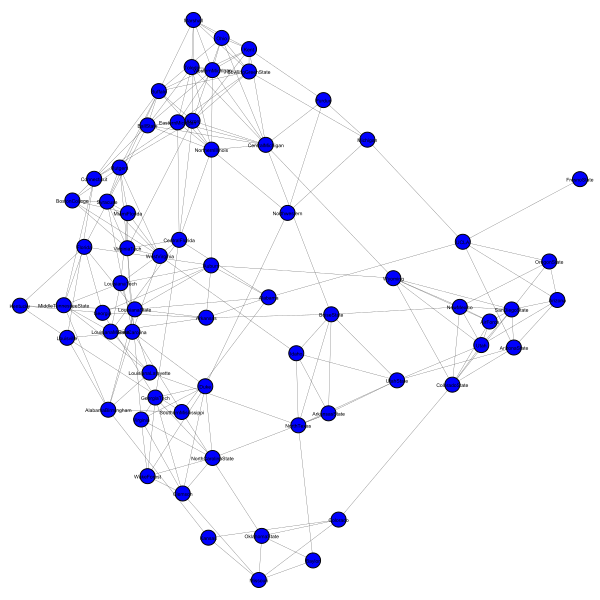

In [173]:
degree_sorted = sorted(range(len(degree)), key=lambda k: degree[k])

items2remove = 50




red_g = g.subgraph(degree_sorted[:(len(degree_sorted)-items2remove)])
print("Number of nodes in subgraph: % 2d" %(len(red_g.vs())))

layout_fr = red_g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = red_g.vs["label"]
visual_style["edge_width"] = .25
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

ZZZ = ig.plot(red_g, **visual_style)
ZZZ.save('Graph_removing_{0}nodes.jpg'.format(items2remove) )
ZZZ

### How many nodes do you have to remove before it starts collapsing

When removing 30 of the nodes with the highest degree we can still discern some structure, perhaps due to the many links between the rest of the nodes which are not that far from the highest ones, how eve when we go to 50 removals the network clearly looses its shape and its essence.

## Task 5: Shortest Path

In [14]:
# Node Sheppard Afb/Wichita Falls Mun
id1 = g.vs["name"].index("Sheppard Afb/Wichita Falls Mun")
id2 = g.vs["name"].index("West Tinian")
print("Sheppard Afb/Wichita Falls Mun = % 2d, West Tinian = % 2d" %(id1, id2))

Sheppard Afb/Wichita Falls Mun =  246, West Tinian =  331


In [15]:
# Nodes extrated from shortest path
path= g.get_shortest_paths(id1, id2)
print(path)
print()
for n in path[0]:
    print("{}".format(g.vs[n]['id']))

[[246, 260, 312, 328, 326, 331]]

Sheppard Afb/Wichita Falls Mun
Dallas/Fort Worth Intl
Honolulu Intl
Guam Intll
Saipan Intl
West Tinian


In [16]:
# Edges extrated from shortest path
epath= g.get_shortest_paths(id1, id2,output="epath")
print(epath)
for n in epath[0]:
    print("edge: % 2d; % 2d -- % 2d" %(n, g.es[n].source,g.es[n].target))

[[127, 54, 574, 1521, 1677]]
edge:  127;  246 --  260
edge:  54;  260 --  312
edge:  574;  312 --  328
edge:  1521;  326 --  328
edge:  1677;  326 --  331


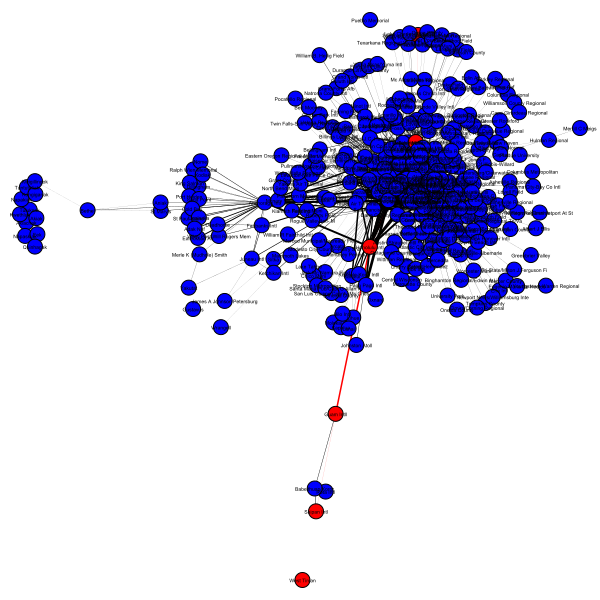

In [20]:
# Visualize the shortest path in the Fruchterman-Reingold layout
vcolor = ["blue"]*g.vcount()
for n in path[0]:
  vcolor[n]="red"

ecolor = ["black"]*g.ecount()
for n in epath[0]:
  ecolor[n]="red"

visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_label_size"]=5
visual_style["vertex_color"] = vcolor
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [ 5 * w for w in g.es["weight"]]
visual_style["edge_color"] = ecolor
visual_style["layout"] = layout_fr
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

SP_plot = ig.plot(g, **visual_style)


SP_plot.save('Shortest_path.jpg')
SP_plot

#ig.plot(g, easygui.filesavebox(), **visual_style)

## Task 6: Export network and visualizations

In [23]:
g.save('network.net')